In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = {
    "lampada_I": [2.40, 2.52, 2.65, 2.77, 2.89, 3.02, 3.12, 3.23, 3.34, 3.43, 3.52, 3.65, 3.76], # A # erro: 2.0% + 5D
    "lampada_V": [4.40, 4.89, 5.36, 5.8, 6.26, 6.79, 7.21, 7.72, 8.18, 8.65, 9.09, 9.59, 10.07], # V # erro: 0.5% + 3D
    "sensor_V": [3.5, 4.6, 5.7, 6.7, 7.8, 9.0, 10, 11.3, 12.4, 13.4, 14.9, 16.5, 18], # V10e-3 # 1.2% + 4D
}

#               R em temperatura ambiente
def calc_dref(R: float = 0.290, T: int = 300, T_ref: int = 300, alfa: int = 4.5*10e-3) -> float:
    return R / ((T - T_ref) * alfa + 1)

In [3]:
round(calc_dref(), 2)

0.29

In [4]:
df = pd.DataFrame(data)

In [5]:
df['R'] = df['lampada_V'] / df['lampada_I']

In [6]:
df['R_REF'] = calc_dref()

In [7]:
df['R/R_REF'] = df['R']/df['R_REF'] 

In [ ]:
df

,lampada_I,lampada_V,sensor_V,R,R_REF,R/R_REF
0,2.40,4.40,3.5,1.833333,0.29,6.321839
1,2.52,4.89,4.6,1.940476,0.29,6.691297
2,2.65,5.36,5.7,2.022642,0.29,6.974626
3,2.77,5.80,6.7,2.093863,0.29,7.220217
4,2.89,6.26,7.8,2.166090,0.29,7.469276
5,3.02,6.79,9.0,2.248344,0.29,7.752912
6,3.12,7.21,10.0,2.310897,0.29,7.968612
7,3.23,7.72,11.3,2.390093,0.29,8.241700
8,3.34,8.18,12.4,2.449102,0.29,8.445179
9,3.43,8.65,13.4,2.521866,0.29,8.696089


Erros associados:

Pelos valores do múltimetro

fonte: https://portal.if.usp.br/labdid/sites/portal.if.usp.br.labdid/files/Et-2042-1101%282%29.pdf

Erro percentual + erro do digito:

In [9]:
# ERRO PERCENTUAL + ERRO DO DÍGITO (D5)
df['E_lampada_I'] = df['sensor_V'] * 0.02 + 5 * 0.01
df['E_lampada_V'] = df['sensor_V'] * 0.005 + 3 * 0.01
df['E_sensor_V'] =  df['sensor_V'] * 0.012 + 4 * 0.01

df['Erro_asssociado_em_R'] = df['R'] * np.sqrt((df['E_lampada_V']/df['lampada_V'])**2 + (df['E_lampada_I']/df['lampada_I'])**2)

In [10]:
df[['R', 'Erro_asssociado_em_R']]

,R,Erro_asssociado_em_R
0,1.833333,0.093779
1,1.940476,0.111349
2,2.022642,0.127106
3,2.093863,0.140963
4,2.166090,0.156235
5,2.248344,0.173023
6,2.310897,0.186935
7,2.390093,0.205979
8,2.449102,0.220242
9,2.521866,0.235510


ajuste linear para determinar a temperatura dado R/R_REF do gráfico oferecido pelo experimento

In [11]:
tabela_1 = {
    1.0: 300,
    1.43: 400,
    1.87: 500,
    2.34: 600,
    2.85: 700,
    3.36: 800,
    3.86: 900,
    4.41: 1000,
    4.96: 1100,
    5.48: 1200,
    6.03: 1300,
    6.58: 1400,
    7.14: 1500,
    7.71: 1600,
    8.28: 1700,
    8.86: 1800,
    9.44: 1900,
    10.03: 2000,
    10.63: 2100,
    11.24: 2200,
    11.84: 2300,
    12.46: 2400,
    13.08: 2500,
    13.72: 2600,
    14.34: 2700,
    14.99: 2800,
    15.63: 2900,
    16.29: 3000,
    16.95: 3100,
    17.62: 3200,
    18.28: 3300,
    18.97: 3400,
    19.66: 3500,
    20.35: 3600
}


In [12]:
df_tabela_1 = pd.DataFrame([tabela_1]).T.reset_index().rename(columns={"index": "R/R_REF", 0: "T"})

In [13]:
ln = LinearRegression(fit_intercept=True)

In [14]:
ln.fit(df_tabela_1[['R/R_REF']], df_tabela_1[['T']])

LinearRegression()

In [15]:
ln.coef_

array([[169.21189]])

In [16]:
ln.intercept_

array([249.52004195])

In [17]:
df['T_do_filamento'] = ln.predict(df[['R/R_REF']])

In [18]:
df

,lampada_I,lampada_V,sensor_V,R,R_REF,R/R_REF,E_lampada_I,E_lampada_V,E_sensor_V,Erro_asssociado_em_R,T_do_filamento
0,2.40,4.40,3.5,1.833333,0.29,6.321839,0.120,0.0475,0.0820,0.093779,1319.250381
1,2.52,4.89,4.6,1.940476,0.29,6.691297,0.142,0.0530,0.0952,0.111349,1381.767089
2,2.65,5.36,5.7,2.022642,0.29,6.974626,0.164,0.0585,0.1084,0.127106,1429.709672
3,2.77,5.80,6.7,2.093863,0.29,7.220217,0.184,0.0635,0.1204,0.140963,1471.266540
4,2.89,6.26,7.8,2.166090,0.29,7.469276,0.206,0.0690,0.1336,0.156235,1513.410307
5,3.02,6.79,9.0,2.248344,0.29,7.752912,0.230,0.0750,0.1480,0.173023,1561.404871
6,3.12,7.21,10.0,2.310897,0.29,7.968612,0.250,0.0800,0.1600,0.186935,1597.903913
7,3.23,7.72,11.3,2.390093,0.29,8.241700,0.276,0.0865,0.1756,0.205979,1644.113605
8,3.34,8.18,12.4,2.449102,0.29,8.445179,0.298,0.0920,0.1888,0.220242,1678.544676
9,3.43,8.65,13.4,2.521866,0.29,8.696089,0.318,0.0970,0.2008,0.235510,1721.001743


Text(0, 0.5, 'Tensão [V]')

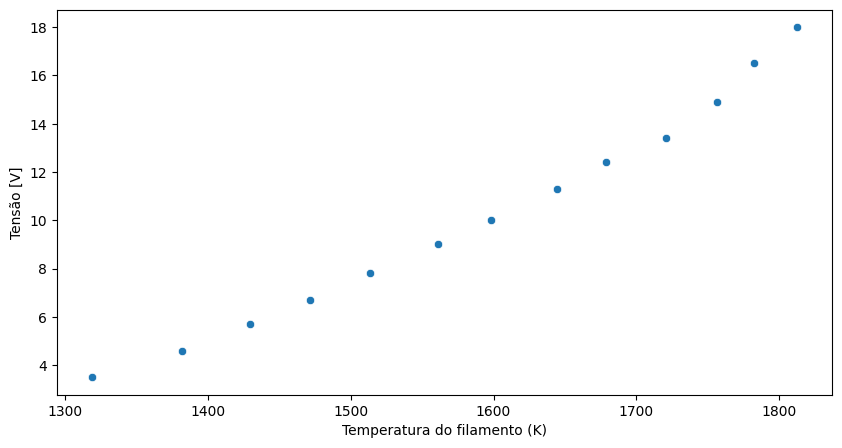

In [19]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, y="sensor_V", x="T_do_filamento")
plt.xlabel("Temperatura do filamento (K)")
plt.ylabel("Tensão [V]")

In [20]:
df['log_sensor_V'] = np.log(df['sensor_V'])
df['log_T_do_filamento'] = np.log(df['T_do_filamento'])

In [21]:
df = df.sort_values(by='lampada_I', ascending=False)

In [22]:
def func(x, pos):
    s = str(round(x, 2))
    ind = s.index('.')
    return s[:ind] + ',' + s[ind+1:] 

In [23]:
import matplotlib.ticker as tkr


In [24]:
y_format = tkr.FuncFormatter(func)

Text(0, 0.5, 'log(V)')

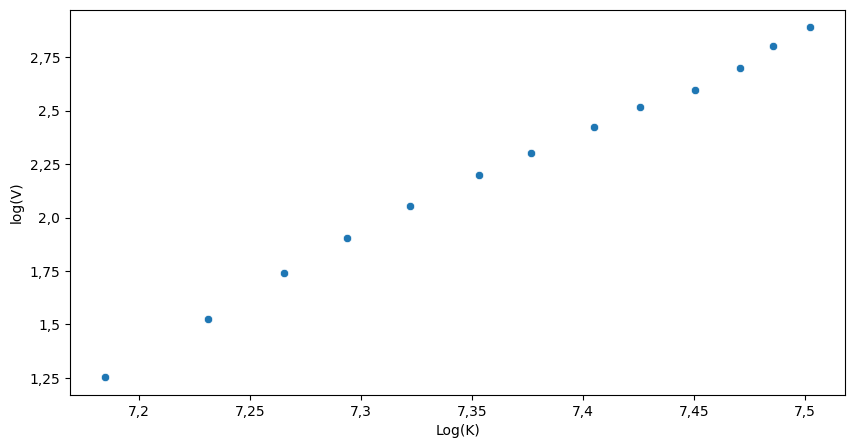

In [25]:
plt.figure(figsize=(10, 5))
ax = sns.scatterplot(y=df['log_sensor_V'], x=df['log_T_do_filamento'])
ax.yaxis.set_major_formatter(y_format)
ax.xaxis.set_major_formatter(y_format)
plt.xlabel("Log(K)")
plt.ylabel("log(V)")

In [26]:
ln_1 = LinearRegression(fit_intercept=True)

ln_1.fit(df[['log_T_do_filamento']], df[['log_sensor_V']])

LinearRegression()

In [27]:
ln_1.coef_

array([[4.95173066]])

In [28]:
df['predicted'] = ln_1.predict(df[['log_T_do_filamento']])

In [29]:
HEHEEHE = f"{ln_1.coef_[0][0]:.4f}".replace(".", ',')
XDDD = f"{ln_1.intercept_[0]:.4f}".replace(".", ",")

Text(0, 0.5, 'log(T)')

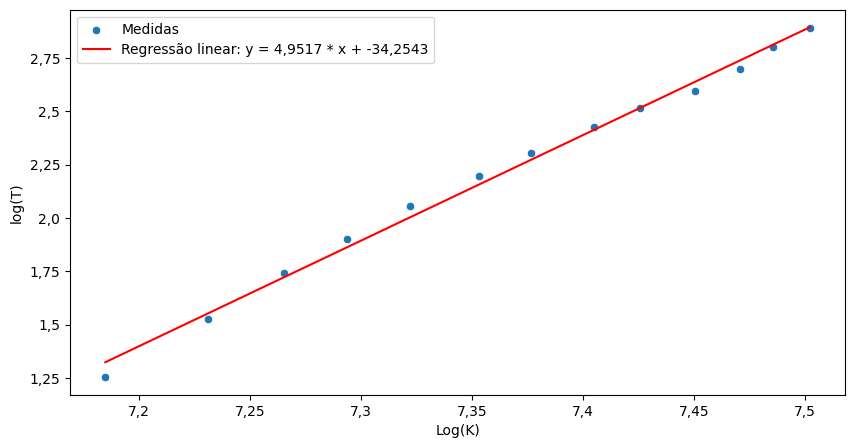

In [30]:
plt.figure(figsize=(10, 5))
sns.scatterplot(y=df['log_sensor_V'], x=df['log_T_do_filamento'], label='Medidas')
ax = sns.lineplot(y=df['predicted'], x=df['log_T_do_filamento'], color='red', label=f'Regressão linear: y = {HEHEEHE} * x + {XDDD}')
ax.yaxis.set_major_formatter(y_format)
ax.xaxis.set_major_formatter(y_format)
plt.xlabel("Log(K)")
plt.ylabel("log(T)")

In [31]:
df

,lampada_I,lampada_V,sensor_V,R,R_REF,R/R_REF,E_lampada_I,E_lampada_V,E_sensor_V,Erro_asssociado_em_R,T_do_filamento,log_sensor_V,log_T_do_filamento,predicted
12,3.76,10.07,18.0,2.678191,0.29,9.235143,0.410,0.1200,0.2560,0.293776,1812.216055,2.890372,7.502306,2.895094
11,3.65,9.59,16.5,2.627397,0.29,9.059991,0.380,0.1125,0.2380,0.275268,1782.578167,2.803360,7.485816,2.813441
10,3.52,9.09,14.9,2.582386,0.29,8.904781,0.348,0.1045,0.2188,0.257024,1756.314791,2.701361,7.470973,2.739943
9,3.43,8.65,13.4,2.521866,0.29,8.696089,0.318,0.0970,0.2008,0.235510,1721.001743,2.595255,7.450662,2.639367
8,3.34,8.18,12.4,2.449102,0.29,8.445179,0.298,0.0920,0.1888,0.220242,1678.544676,2.517696,7.425682,2.515676
7,3.23,7.72,11.3,2.390093,0.29,8.241700,0.276,0.0865,0.1756,0.205979,1644.113605,2.424803,7.404957,2.413048
6,3.12,7.21,10.0,2.310897,0.29,7.968612,0.250,0.0800,0.1600,0.186935,1597.903913,2.302585,7.376448,2.271880
5,3.02,6.79,9.0,2.248344,0.29,7.752912,0.230,0.0750,0.1480,0.173023,1561.404871,2.197225,7.353341,2.157462
4,2.89,6.26,7.8,2.166090,0.29,7.469276,0.206,0.0690,0.1336,0.156235,1513.410307,2.054124,7.322121,2.002867
3,2.77,5.80,6.7,2.093863,0.29,7.220217,0.184,0.0635,0.1204,0.140963,1471.266540,1.902108,7.293879,1.863020
